In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


# Maße der zentralen Tendenz

In [4]:
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Um ein Gefühl für einen Datensatz zu bekommen, kann er durch numerische Streuungsmaße beschrieben werden. Es gibt drei Hauptmaße für die **zentrale Tendenz**: den **Mittelwert**, den **Median** und den **Modalwert**; es gibt jedoch auch andere Maße für die zentrale Tendenz, wie z. B. das **harmonische Mittel**, das **gewichtete Mittel** und das **geometrische Mittel**, um nur einige zu nennen.

## Der Mittelwert


### Der arithmethische Mittelwert

$$\text{Mittelwert} = \frac{\text{Summe aller Werte}}{\text{Anzahl aller Werte}}$$

Das für Stichprobendaten berechnete arithmetische Mittel wird mit $\bar{x}$ (gelesen als "x strich") bezeichnet, und das Mittel für Grundgesamtheitsdaten wird mit $\mu$ (griechischer Buchstabe mu) bezeichnet. Der Mittelwert kann also durch die folgenden Gleichungen ausgedrückt werden:

$$\bar{x}=\frac{1}{n} \cdot \sum_{i=1}^n x_i$$

oder

$$\mu=\frac{1}{N} \cdot \sum_{i=1}^N x_i$$

wobei $\sum_{i=1}^n x_i$ die Summe aller Werte $(x_1,x_2,...,x_n)$, $N$ der Umfang der Grundgesamtheit und $n$ der Stichprobenumfang ist.
Betrachten wir die Variable `height` im Datensatz `students` und berechnen wir ihr arithmetisches Mittel. Beachten Sie, dass es sich bei dem `students` Datensatz um eine *Stichprobe* und **nicht** um die Grundgesamtheit aller Studenten handelt. Daher berechnen wir $\bar{x}$, den Stichprobenmittelwert.

In [5]:
df = pd.read_csv("../../data/students.csv", index_col=0)
# Wende Funktion mean() auf Spalte 'height' an und speicher Ergebnis in height_mean
height_mean = df["height"].mean()
print(f"Mittelwert der Körpergöße der Studenten: {height_mean}")

Mittelwert der Körpergöße der Studenten: 171.38075009103048


### Das geometrische Mittel
Bei der Untersuchung von Phänomenen wie der Inflation oder der Bevölkerungsentwicklung, die mit periodischen Zu- oder Abnahmen einhergehen (so genannte Veränderungsraten), ist das **geometrische Mittel** besser geeignet, um die durchschnittliche Veränderung über den gesamten Untersuchungszeitraum zu ermitteln. Um das geometrische Mittel einer Folge von $n$ Werten $x_1,x_2,\dots,x_n $ zu berechnen, werden diese miteinander multipliziert und dann die $n$-te Wurzel aus diesem Produkt ermittelt.

$$ \bar{x}_{geo}=\sqrt{x_1\cdot x_2 \cdots  x_n}$$

was umgeschrieben werden kann als

$$ \bar{x}_{geo} = \sqrt{x_1\cdot x_2 \cdots  x_n} = (\prod_{i=1}^n x_i)^{\frac{1}{n}} = \sqrt[n]{\prod_{i=1}^n x_i}$$

Lassen Sie uns das an einem Beispiel verdeutlichen: <br> 
Wir betrachten die jährlichen Wachstumsraten eines Schwarmes von Honigbienen über einen Zeitraum von $5$ Jahren. Diese Veränderungsraten sind: $14 \%$, $26 \%$, $16 \%$, $-38 \%$, $-6 \%$. Außerdem wissen wir, dass sich zu Beginn des Beobachtungszeitraums $5.000$ Bienen im Schwarm befunden haben. Wir suchen nach der mittleren Rate der Populationsveränderung. <br>
Zunächst schreiben wir unsere Wachstumsraten in eine Liste.

In [6]:
bees = [14, 26, 16, -38, -6]

Nun wenden wir wider besseres Wissens das arithmetische Mittel an: <br>

In [7]:
# Wir verwenden die Funktion `mean()` im Paket `numpy`.
print(f"Die mittlere Änderungsrate der Bienenpopulation ist {np.mean(bees)} Prozent")

Die mittlere Änderungsrate der Bienenpopulation ist 2.4 Prozent


Das arithmetische Mittel zeigt, dass der Schwarm über den Zeitraum von fünf Jahren wächst! Wir sind skeptisch und berechnen das jährliche Wachstum des Bienenschwarms explizit. Zunächst wandeln wir die angegebenen Prozentsätze in relative Wachstumsraten um (`bees_growth_rel`), und dann berechnen wir einfach den Stand der Bienenpopulation, indem wir die Veränderungsraten nacheinander mit der Anzahl der Bienen multiplizieren, von der wir wissen, dass sie zu Beginn der Erhebung $5.000$ betrug.

In [8]:
print("bees:       ", bees)
# Initialisiere leere Liste bees_growth_rel und Indexvariable i
bees_growth_rel = [np.round(x / 100 + 1, 2) for x in bees]
print("bees rates: ", bees_growth_rel)

bees:        [14, 26, 16, -38, -6]
bees rates:  [1.14, 1.26, 1.16, 0.62, 0.94]


In [9]:
pop = 5000
for rate in bees_growth_rel:
    pop = pop * rate
    print(
        f"Nach einem relativen Wachstum von {rate} erreicht die Population einen Wert von {np.round(pop,0)}"
    )

Nach einem relativen Wachstum von 1.14 erreicht die Population einen Wert von 5700.0
Nach einem relativen Wachstum von 1.26 erreicht die Population einen Wert von 7182.0
Nach einem relativen Wachstum von 1.16 erreicht die Population einen Wert von 8331.0
Nach einem relativen Wachstum von 0.62 erreicht die Population einen Wert von 5165.0
Nach einem relativen Wachstum von 0.94 erreicht die Population einen Wert von 4855.0


Wow, was für eine Überraschung! Offensichtlich stimmt da etwas nicht! Wir hatten erwartet, dass der Schwarm im Laufe der Zeit im Durchschnitt zunehmen würde. Wir haben jedoch einen Rückgang der absoluten Zahl der Bienen berechnet! 

Versuchen wir es mit dem geometrischen Mittel. Zum Glück gibt es in Python vordefinierte Funktionspakete für Berechnung von Streuungsmaßen. Diese können durch `import statistics` verwendet werden. Die Funktion für das geometrische Mittel heisst `geometric_mean()`

In [10]:
st.geometric_mean(bees_growth_rel)

0.9941469529781075

Großartig! Das geometrische Mittel zeigt, dass die Zahl der Arten im Laufe der Zeit mit einer durchschnittlichen Rate von $0,994$ abnimmt, was $-0,006 \% $ entspricht. Wir überprüfen dies, indem wir $5.000$ Bienen (die anfängliche Anzahl der Bienen im Schwarm) mal $0,994$ für jedes Jahr nehmen; dies ergibt $4.971$ Bienen nach dem ersten Jahr, $4.942$ nach dem zweiten Jahr, $4.913$ nach dem dritten Jahr, $4.884$ nach dem vierten Jahr und $4.855$ nach dem fünften Jahr der Beobachtung. Eine perfekte Übereinstimmung! Im Gegensatz zum arithmetischen Mittel gibt das geometrische Mittel die Entwicklung im Vergleich zum Vorjahr nicht zu hoch an! <br> <br>


### Der harmonische Mittelwert
Der **harmonische Mittelwert** eignet sich am besten für die Ermittlung des Durchschnitts von inversen Größen wie Geschwindigkeit (km/h) oder Bevölkerungsdichte (pop/km2). 

Betrachten Sie das folgende Beispiel: 
Die Entfernung zwischen Ihrem Haus und dem nächsten See beträgt $40$ km. Sie sind mit einer Geschwindigkeit von $20$ km pro Stunde zum See gefahren und mit einer Geschwindigkeit von $80$ km pro Stunde nach Hause zurückgekehrt. Wie hoch war die Durchschnittsgeschwindigkeit während der gesamten Fahrt?
Berechnen wir zunächst das arithmetische Mittel.

In [11]:
# Initialisiere Liste speed_arithmetic
speed_arithmetic = [20, 80]

print(np.mean(speed_arithmetic))

50.0


Das arithmetische Mittel der beiden Geschwindigkeiten, mit denen Sie gefahren sind, beträgt $50$ km pro Stunde. Dies ist jedoch nicht die richtige Durchschnittsgeschwindigkeit. Es lässt die Tatsache außer Acht, dass Sie mit $20$ km/h viel länger gefahren sind als mit $80$ km/h. Um die richtige Durchschnittsgeschwindigkeit zu ermitteln, müssen wir stattdessen das harmonische Mittel berechnen. 

Das harmonische Mittel $\bar{x}_h$für die positiven reellen Zahlen $x_1,x_2,...,x_n$ ist definiert durch

$$\bar{x}_h = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \cdots + \frac{1}{x_n}} = \frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}} \ \  x_i \gt 0, \ \  \forall \ \ i \ \ $$

Wir können die vordefinierte Funktion `harmonic_mean` aus dem Packet `statistics` verwenden:

In [12]:
speed = [20, 80]
st.harmonic_mean(speed)

32.0

Aber ist dieses Ergebnis korrekt? Wir versuchen das Ergebnis nachzuvollziehen. Im obigen Beispiel beträgt die Entfernung zwischen dem See und Ihrem Haus $40$ km. Die Fahrt von A nach B mit einer Geschwindigkeit von $20$ km/h dauert also $2$ Stunden. Die Fahrt von B nach A mit einer Geschwindigkeit von $80$ km/h dauert $0,5$ Stunden. Die Gesamtzeit für die Rundstrecke von $2 \times 40$ km beträgt $2,5$ Stunden. Die Durchschnittsgeschwindigkeit beträgt dann $\frac{80}{2,5}=32$.

### Der gewichtete Mittelwert
Es gibt Anwendungen, bei denen bestimmte Werte in einem Datensatz als wichtiger angesehen werden können als andere. Im Allgemeinen gilt für eine Folge von $n$ Datenwerten $x_1,x_2,...,x_n$ und ihren entsprechenden Gewichten $w_1,w_2,...,w_n$, ist das gewichtete (arithmetische) Mittel $\bar{x}_w$ gegeben durch

$$ \bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i} $$

wobei $\sum_{i=1}^n w_i x_i$ durch Multiplikation jedes Datenwertes mit seinem Gewicht und anschließender Addition der Produkte ermittelt wird. <br> <br> Um die Noten der Studenten in einem Kurs zu ermitteln, kann ein Dozent beispielsweise der Abschlussprüfung eine dreimal so hohe Gewichtung zuweisen wie den anderen Prüfungen. Ermitteln wir den gewichteten Mittelwert für einen Studenten, der in den ersten beiden Prüfungen $45$ und $68$ Punkte und in der Abschlussprüfung $74$ Punkte erzielt hat.

Wir berechnen as gewichtete Mittel indem wir die Funktion `np.average()` anwenden.

In [13]:
# Initialisiere Liste scores, weights_scores und leere Liste weighted
scores = [45, 68, 74]
weights_scores = [1, 1, 3]
np.average(scores, weights=weights_scores)

67.0

Verglichen mit dem nicht gewichteten Mittelwert ergibt sich ein anderes Ergebnis.

In [14]:
np.mean(scores)

62.333333333333336

Bitte beachten Sie, dass die Gewichtung der Eingabewerte ein Prinzip ist, das auch auf andere Mittelwertmaße anwendbar ist. Zum Beispiel können wir die Eingangsvariable für die Berechnung des geometrischen Mittels gewichten.

### Der gewichtete geometrische Mittelwert

$$\bar{x}_{geo_w}= (\prod_{i=1}^n {x_i}^{w_i})^{1/\sum_{i=1}^n w_i}$$

wobei $x_1,x_2,\dots x_n$ den Datenwerten und $w_1,w_2,\dots w_n$ den Gewichten entsprechen. 

Wir greifen auf die Implementierung des gewichteten geometrischen Mittelwerts im [Scipy](https://scipy.org/) Modul zurück. 

In [15]:
from scipy.stats import gmean

Wir berechnen das Beispiel des Bienenschwarms aus dem obigen Abschnitt erneut. Wir erinnern uns, dass wir im obigen Beispiel einen Bienenschwarm über $5$ Jahre beobachtet und die Veränderungsraten der Bienenpopulation notiert haben. Die jährlichen Veränderungsraten waren $1,14 \ $,$ \  1,26 \ $,$ \  1,16 \ $,$ \  0,62 \ $,$ \  0,94$, was $x_1, x_2,...x_n$ entspricht. Um das Ergebnis von oben zu reproduzieren, setzen wir alle Gewichte $w_1,w_2,\dots w_n$ auf $1$.

In [16]:
weights_bees = [1, 1, 1, 1, 1]
gmean(bees_growth_rel, weights=weights_bees)

0.9941469529781075

In [17]:
gmean(bees_growth_rel, weights=weights_bees) == gmean(bees_growth_rel)

True

Korrekt, wir erhalten das gleiche Ergebnis!
Falls wir nun jedes konsekutive Element mehr gewichten wollen, können wir die Gewichte auf z.B. $[1, 2, 3, 4]$ setzen.

In [18]:
weights_bees = [1, 2, 3, 4, 5]
gmean(bees_growth_rel, weights=weights_bees)

0.9241626141253284

### Der gewichtete harmonische Mittelwert

Schließlich werden wir eine eigene gewichtete harmonische Mittelwertfunktion implementieren. <br> <br> Das gewichtete harmonische Mittel $\bar{x}$ für die positiven reellen Zahlen $x_1,x_2,\dots,x_n$ ist durch die folgende Gleichung definiert:

$$ \bar{x}_{hw} = \frac{w_1+w_2 + \cdots + w_n}{\frac{w_1}{x_1} + \frac{w_2}{x_2} + \cdots  + \frac{w_n}{x_n}} = \frac{\sum_{i=1}^n w_i}{\sum_{i=1}^n\frac{w_i}{x_i}} ,\  x_i \gt 0, \ \forall \ \ i \ \ $$

Implementieren wir die Funktion des gewichteten harmonischen Mittels in Python. Die Kodierung ist einfach, aber um die Funktionalität unserer Funktion des gewichteten harmonischen Mittels zu erweitern, fügen wir eine `if`-Anweisung ein. Diese `if`-Anweisung im Code normalisiert die Gewichte, wenn die Gewichte nicht in Proportionen angegeben sind. Wenn die `if`-Anweisung ausgeführt wird, geben wir ein Benutzer-Feedback aus, andernfalls erfolgt keine Rückmeldung.

In [19]:
# Definiere Funktion my_weighted_harmonic_mean
def my_weighted_harmonic_mean1(data: np.array, weights: np.array):
    if np.sum(weights) != 1:
        print("Die Gewichte werden normalisiert")
        weights = weights / np.sum(weights)
    return np.sum(weights) / sum(weights / data)

Lassen Sie uns unser `my_weighted_harmonic_mean` an einem recht komplexen Datensatz ausprobieren. Der Datensatz `cities` besteht aus allen Landeshauptstädten Deutschlands, ihrer Bevölkerungszahl und ihrer Fläche. Ziel ist es, die mittlere Bevölkerungsdichte für die Landeshauptstädte Deutschlands zu berechnen. Sie können die Datei `cities.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/cities.csv">hier</a> herunterladen. Die Daten werden von dieser <a href="https://www.bundeslaenderdeutschland.de/landeshauptstaedte/">Website</a> abgerufen.

Zunächst laden wir den Datensatz, geben ihm einen passenden Namen und schauen ihn uns an.

In [20]:
df = pd.read_csv("../../data/cities.csv")
df

,name,state,area_km2,pop.size
0,Berlin,Land Berlin,891.85,3415100
1,Bremen,Freie Hansestadt Bremen,325.42,546450
2,Dresden,Freistaat Sachsen,328.31,525100
3,Düsseldorf,Land Nordrhein-Westfalen,217.41,593682
4,Erfurt,Freistaat Thüringen,269.17,203480
5,Hamburg,Freie und Hansestadt Hamburg,755.26,1751780
6,Hannover,Land Niedersachsen,204.14,514130
7,Kiel,Land Schleswig-Holstein,118.60,239860
8,Magdeburg,Land Sachsen-Anhalt,200.97,229924
9,Mainz,Land Rheinland-Pfalz,97.76,202750


Zweitens erstellen wir eine neue Spalte und berechnen die Bevölkerungsdichte (Einwohner pro Quadratkilometer) und speichern das Ergebniss in der Spalte `density`.

In [21]:
df["density"] = df["pop.size"] / df["area_km2"]
df

,name,state,area_km2,pop.size,density
0,Berlin,Land Berlin,891.85,3415100,3829.231373
1,Bremen,Freie Hansestadt Bremen,325.42,546450,1679.214554
2,Dresden,Freistaat Sachsen,328.31,525100,1599.403003
3,Düsseldorf,Land Nordrhein-Westfalen,217.41,593682,2730.702360
4,Erfurt,Freistaat Thüringen,269.17,203480,755.953487
5,Hamburg,Freie und Hansestadt Hamburg,755.26,1751780,2319.439663
6,Hannover,Land Niedersachsen,204.14,514130,2518.516704
7,Kiel,Land Schleswig-Holstein,118.60,239860,2022.428331
8,Magdeburg,Land Sachsen-Anhalt,200.97,229924,1144.071254
9,Mainz,Land Rheinland-Pfalz,97.76,202750,2073.956628


Drittens berechnen wir das Gewicht für jede Stadt entsprechend der Bevölkerungszahl und speichern das Ergebniss in der Spalte `cities_pop_weight`.

In [22]:
df["cities_pop_weight"] = df["pop.size"] / df["pop.size"].sum()
df

,name,state,area_km2,pop.size,density,cities_pop_weight
0,Berlin,Land Berlin,891.85,3415100,3829.231373,0.313058
1,Bremen,Freie Hansestadt Bremen,325.42,546450,1679.214554,0.050092
2,Dresden,Freistaat Sachsen,328.31,525100,1599.403003,0.048135
3,Düsseldorf,Land Nordrhein-Westfalen,217.41,593682,2730.702360,0.054422
4,Erfurt,Freistaat Thüringen,269.17,203480,755.953487,0.018653
5,Hamburg,Freie und Hansestadt Hamburg,755.26,1751780,2319.439663,0.160584
6,Hannover,Land Niedersachsen,204.14,514130,2518.516704,0.047130
7,Kiel,Land Schleswig-Holstein,118.60,239860,2022.428331,0.021988
8,Magdeburg,Land Sachsen-Anhalt,200.97,229924,1144.071254,0.021077
9,Mainz,Land Rheinland-Pfalz,97.76,202750,2073.956628,0.018586


Nun wenden wir unsere Implementierung des gewichteten harmonischen Mittels `my_weighted_harmonic_mean` an und vergleichen es mit dem arithmetischen Mittel.

In [23]:
# Wir verwenden die Spalte "cities_pop_weight" als Gewichte. Hier ist keine Normalisierung notwending.
my_weighted_harmonic_mean1(df["density"], df["cities_pop_weight"])

2363.437731548685

Jetzt testen wir die Funktionalität unserer Funktion, indem wir `pop.size` als Eingabeparameter angeben.

In [24]:
# Wir verwenden die Spalte "pop.size" als Gewichte. Ein Normalisierung ist notwending.
my_weighted_harmonic_mean1(df["density"], df["pop.size"])

Die Gewichte werden normalisiert


2363.437731548685

Wunderbar, die Funktion funktioniert wie erwartet. Die Ergebnisse sind identisch. Wir können daraus schließen, dass die durchschnittliche Bevölkerungsdichte in den Landeshauptstädten Deutschlands etwa $2.363$ Einwohner/km$^2$ beträgt.

Zum Vergleich können wir das arithmetische Mittel der Bevölkerungsdichte berechnen. Dieses würde uns hier ein weniger exaktes Ergebnis liefern. 

In [25]:
df["density"].mean()

1998.2545454902418

## Der Median

Ein weiteres sehr wichtiges Maß für die zentrale Tendenz ist der **Median**. Der Median von Messwerten ist der Wert des mittleren Terms in einem Datensatz, der in aufsteigender Reihenfolge geordnet wurde. Der Median unterteilt also einen geordneten Datensatz **in zwei gleiche Teile**.
Die Berechnung des Medians besteht aus den folgenden zwei Schritten: 
1. Ordnen Sie den Datensatz in aufsteigender Reihenfolge.    
2. Finden Sie den mittleren Term. Der Wert dieses Terms ist der Median.

Wenn die Anzahl der Beobachtungen in einem Datensatz ungerade ist, wird der Median durch den Wert des mittleren Terms in den geordneten Daten bestimmt. Ist die Anzahl der Beobachtungen jedoch gerade, so wird der Median durch den Durchschnitt der Werte der beiden mittleren Terme bestimmt ({cite:p}`fahrmeirstatistik` s.52). <br> <br> Lassen Sie uns den Median für die Variable `age` des `students` Datensatzes auswerten.

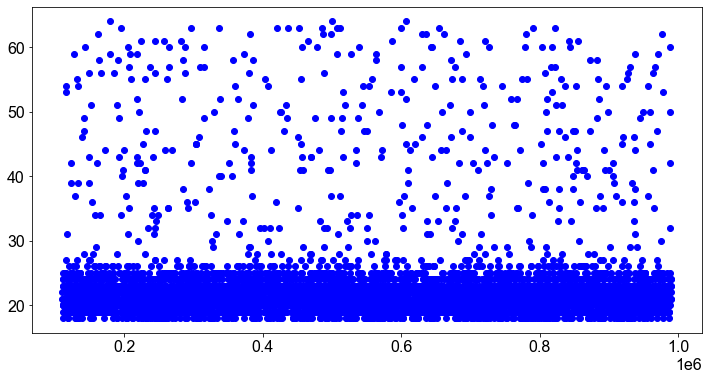

In [26]:
df = pd.read_csv("../../data/students.csv", index_col=0)
plt.plot(df.index, df.age, "bo")

Wenn wir die Variable `age` plotten, erkennen wir sofort, dass es einige Studenten gibt, die viel älter sind als der Rest der Studenten. Lassen Sie uns den Median berechnen...

In [27]:
print(f"Median des Alters der Studenten:     {np.median(df.age)}")
print(f"Mittelwert des Alters der Studenten: {np.mean(df.age)}")

Median des Alters der Studenten:     21.0
Mittelwert des Alters der Studenten: 22.541570578953756


Zur Veranschaulichung fügen wir nun den Median und das arithmetische Mittel in das Streudiagramm ein.

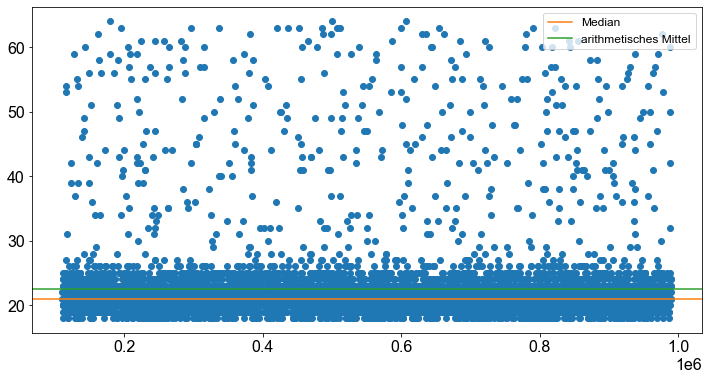

In [28]:
plt.plot(df.index, df.age, "o", color="C0")
plt.axhline(np.median(df.age), label="Median", color="C1")
plt.axhline(np.mean(df.age), label="arithmetisches Mittel", color="C2")
plt.legend()

Noch deutlicher veranschaulicht ein Histogram den Sachverhalt, dass das arithmetische Mittel stark durch Extremwerte und Ausreisser beeinflusst wird, der Median hingegen nicht. Daher wird der Median als Maß für die zentrale Tendenz bei Datensätzen, die Ausreißer enthalten, dem Mittelwert vorgezogen ({cite:p}`fahrmeirstatistik` s.54).    

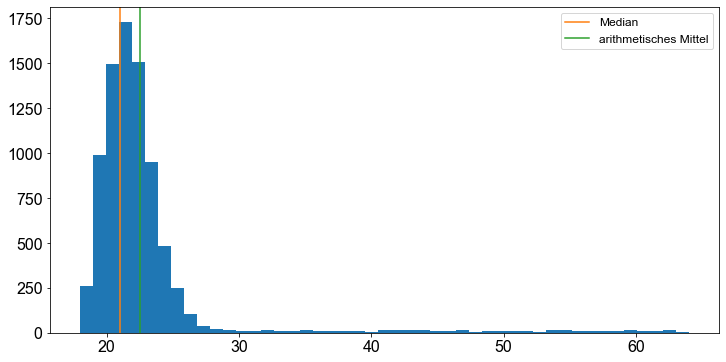

In [50]:
plt.hist(df.age, bins=df.age.nunique())
plt.axvline(np.median(df.age), label="Median", color="C1")
plt.axvline(np.mean(df.age), label="arithmetisches Mittel", color="C2")
plt.legend()

## Der Modalwert

In der Statistik stellt der **Modus** den häufigsten Wert in einem Datensatz dar. Der Modalwert ist also der Wert, der in einem Datensatz mit der größten Häufigkeit auftritt *({cite:p}`fahrmeirstatistik` s. 53)*. In Bezug auf die graphische Häufigkeitsverteilung entspricht der Modus dem Scheitelpunkt bzw. den Scheitelpunkten des Diagramms. Ein großes Manko des Modus ist, dass ein Datensatz keinen oder mehr als einen Modalwert haben kann, während er nur einen Mittelwert und nur einen Median hat. Ein Datensatz, bei dem jeder Wert nur einmal vorkommt, hat zum Beispiel keinen Modus. Ein Datensatz, bei dem nur ein Wert mit der größten Häufigkeit vorkommt, hat nur einen Modus. Der Datensatz wird in diesem Fall als **unimodal** bezeichnet. Ein Datensatz mit zwei Werten, die am häufigsten vorkommen, hat zwei Modi. Die Verteilung wird in diesem Fall als **bimodal** bezeichnet. Wenn mehr als zwei Werte in einem Datensatz am häufigsten vorkommen, dann enthält der Datensatz mehr als zwei Modi und wird als **multimodal** bezeichnet ({cite:p}`fahrmeirstatistik` s. 81,83).

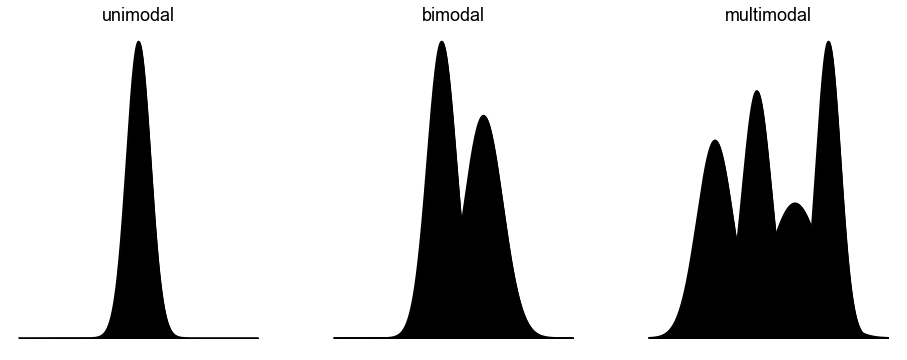

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.arange(-100, 100, 0.1)
TITELSIZE = 18
COLOR = "k"

fig, ax = plt.subplots(ncols=3, figsize=(16, 6))

for i in [(0, 10)]:
    mean = i[0]
    sd = i[1]
    y_axis = norm.pdf(x_axis, mean, sd)
    ax[0].plot(x_axis, y_axis, color=COLOR)
    ax[0].fill_between(x_axis, y_axis, color=COLOR)
ax[0].set_title("unimodal", size=TITELSIZE)

for i in [(-10, 12), (25, 16)]:
    mean = i[0]
    sd = i[1]
    y_axis = norm.pdf(x_axis, mean, sd)
    ax[1].plot(x_axis, y_axis, color=COLOR)
    ax[1].fill_between(x_axis, y_axis, color=COLOR)
ax[1].set_title("bimodal", size=TITELSIZE)


for i in [(-10, 12), (22, 22), (-45, 15), (50, 10)]:
    mean = i[0]
    sd = i[1]
    y_axis = norm.pdf(x_axis, mean, sd)
    ax[2].plot(x_axis, y_axis, color=COLOR)
    ax[2].fill_between(x_axis, y_axis, color=COLOR)
ax[2].set_title("multimodal", size=TITELSIZE)


for _ax in ax:
    _ax.axis("off")

Anders als der Mittelwert und der Median kann der Modus für quantitative (numerische) und qualitative (kategoriale) Daten verwendet werden. Python verfügt über eine vordefinierte Funktion `mode()` zur Berechnung des Modus im Paket `statistics`. Wir verwenden diese um den Modalwert aller Spaltenwerte des `students` Datensatzes zu berechnen.

In [30]:
df = pd.read_csv("../../data/students.csv")
for col in ["gender", "age", "religion", "nc_score", "semester", "height", "weight"]:
    print(f"Der Modalwert der Spalte '{col}' ist '{st.mode(df[col])}'.")

Der Modalwert der Spalte 'gender' ist 'Male'.
Der Modalwert der Spalte 'age' ist '21'.
Der Modalwert der Spalte 'religion' ist 'Catholic'.
Der Modalwert der Spalte 'nc_score' ist '1.18'.
Der Modalwert der Spalte 'semester' ist '1st'.
Der Modalwert der Spalte 'height' ist '174'.
Der Modalwert der Spalte 'weight' ist '67.1'.
